# Project 3: Implementing a Simple Recurrent Neural Network (RNN)

## Introduction

In this project, you will design, implement, and evaluate a simple Recurrent Neural Network (RNN) from scratch. This will involve building the entire pipeline, from data preprocessing to model training and evaluation.

## Objectives

1. Set up TensorFlow or PyTorch environments. You are free to choose your preferred DL platform.
2. Use GPU for training.
3. Create a data loader and implement data preprocessing where needed.
4. Design a Convolutional Neural Network.
5. Train and evaluate your model. Make sure to clearly show loss and accuracy values. Include visualizations too.
6. Answer assessment questions.

## Dataset

You are free to choose any dataset for this project! Kaggle would be a good source to look for datasets. Below are some examples:
- Daily Minimum Temperatures in Melbourne: This dataset contains the daily minimum temperatures in Melbourne, Australia, from 1981 to 1990.
- Daily Bitcoin Prices: This dataset contains historical daily prices of Bitcoin, which can be used for time series forecasting projects.
- Text8 Dataset: This dataset consists of the first 100 million characters from Wikipedia. It's great for text generation or language modeling tasks.
- IMDB Movie Reviews: This dataset contains 50,000 movie reviews for sentiment analysis, split evenly into 25,000 training and 25,000 test sets.
- Jena Climate Dataset: This dataset records various weather attributes (temperature, pressure, humidity, etc.) every 10 minutes, making it ideal for time series analysis.
- Earthquake Aftershocks: This dataset contains seismic data, suitable for predicting aftershocks following major earthquakes.


---
### Questions
Answer the following questions in detail.

1. What is a Recurrent Neural Network (RNN)? Describe its key components and how they differ from those in a feedforward neural network.
2. Explain the purpose of the recurrent connection in an RNN. How does it enable the network to handle sequential data?
3. What are vanishing and exploding gradients, and how do they affect the training of RNNs?
4. Describe the Long Short-Term Memory (LSTM) network and its key components. How does it address the issues of vanishing and exploding gradients?
5. What is the purpose of the GRU (Gated Recurrent Unit) in RNNs? Compare it with LSTM.
6. Explain the role of the hidden state in an RNN. How is it updated during the training process?
7. What are some common evaluation metrics used to assess the performance of an RNN on a sequential task, such as language modeling or time series forecasting?
8. How does data preprocessing impact the performance of RNNs? Provide examples of preprocessing steps for text and time series data.
9. What is sequence-to-sequence learning in the context of RNNs, and what are its applications?
10. How can RNNs be used for anomaly detection in time series data? Describe the general approach.


#### 1. What is a Recurrent Neural Network (RNN)? Describe its key components and how they differ from those in a feedforward neural network.

A Recurrent Neural Network (RNN) is a class of neural networks that is designed for processing sequential data, such as time series, natural language, and other sequences. Unlike feedforward neural networks, RNNs have connections that loop back on themselves, allowing information to persist across time steps. This makes RNNs well-suited for tasks where context and order are important.
Key Components of RNNs:

- Recurrent Neurons:
    - Hidden State: Each neuron in an RNN has a hidden state that captures information from previous time steps. This hidden state is updated at each time step based on the current input and the previous hidden state.
    - Recurrent Connections: Unlike feedforward networks, RNNs have recurrent connections where the output from the previous time step is fed back into the network as part of the input for the current time step.

- Input and Output Layers:
    - Input Layer: Takes the current input and the hidden state from the previous time step to produce the current hidden state.
    -  Output Layer: Produces the output for the current time step based on the current hidden state.

- Activation Functions:
    - Typically use non-linear activation functions like tanh or ReLU to introduce non-linearity and help in capturing complex patterns in the data.

- Loss Function and Backpropagation Through Time (BPTT):
    - RNNs are trained using a variant of backpropagation called Backpropagation Through Time (BPTT), which takes into account the temporal dependencies by unrolling the network through time and applying the chain rule of derivatives.

Differences Between RNNs and Feedforward Neural Networks:

- Temporal Dependency:
    - RNN: Can maintain and utilize information from previous time steps through its hidden states, making it suitable for sequential data.
    - Feedforward Neural Network: Processes inputs independently, without any memory of previous inputs.

- Network Architecture:
    - RNN: Contains loops in the network, where the hidden state at a given time step is fed back into the network along with the next input.
    - Feedforward Neural Network: Has a straightforward structure where the data flows in one direction, from input to output, without any cycles.

- Training Method:
    - RNN: Uses Backpropagation Through Time (BPTT) to handle the sequential nature of the data and the dependencies between time steps.
    - Feedforward Neural Network: Uses standard backpropagation since there are no temporal dependencies to consider.

- Suitability for Tasks:
    - RNN: Ideal for tasks involving sequential data, such as language modeling, time series prediction, and speech recognition.
    - Feedforward Neural Network: More suitable for tasks where inputs are independent and do not form a sequence, such as image classification or simple regression tasks.


#### 2. Explain the purpose of the recurrent connection in an RNN. How does it enable the network to handle sequential data?


Recurrent Neural Networks (RNNs) are specifically designed to handle sequential data, such as time series data, natural language, and any data where order and context are important. The recurrent connection in an RNN is what allows the network to process sequences of data.

##### Purpose of the Recurrent Connection

The recurrent connection in an RNN is a loop that feeds the output of the previous step back into the network as input for the current step. This loop creates a dependency between the current step and the previous steps, allowing the network to maintain a form of memory of what has been processed so far. This is crucial for tasks where the meaning of the current input depends on the previous inputs, such as in language modeling or speech recognition.

##### How it Enables the Network to Handle Sequential Data
- Maintaining State Across Time Steps: The recurrent connection allows the RNN to maintain a hidden state that evolves over time. This hidden state acts as a memory that captures information from previous steps in the sequence. At each time step, the hidden state is updated based on the current input and the previous hidden state, enabling the network to remember and utilize past information.

- Capturing Temporal Dependencies: Sequential data often contains dependencies where the current data point depends on previous data points. The recurrent connections allow RNNs to capture these dependencies by incorporating the history of previous inputs into the current computation. This makes RNNs suitable for tasks like predicting the next word in a sentence or the next value in a time series.

- Handling Variable-Length Sequences: Unlike traditional neural networks, which expect fixed-size input, RNNs can handle variable-length sequences because they process one element of the sequence at a time. The recurrent connection ensures that the information is passed along the sequence, regardless of its length.

#### 3. What are vanishing and exploding gradients, and how do they affect the training of RNNs?

Vanishing and exploding gradients are two related problems that can occur during the training of Recurrent Neural Networks (RNNs), especially when dealing with long sequences. These issues arise due to the nature of the backpropagation algorithm and the way gradients are propagated through time.

Vanishing Gradients: They occur when the gradients of the loss function with respect to the model parameters become exceedingly small. This happens during the backpropagation through time (BPTT) process, where the gradients are propagated backward through many layers (or time steps, in the case of RNNs).

Mathematical Explanation: The gradient at time step tt depends on the product of many gradient terms from previous time steps. If the gradient terms are small (i.e., the derivatives of the activation functions are less than 1), the product of these terms can shrink exponentially, leading to very small gradients.

How Do They Affect Training?

- Slow Learning: When gradients vanish, the updates to the weights become very small. As a result, the learning process slows down significantly because the weights are not adjusted enough to reduce the loss.
- Difficulty in Learning Long-Term Dependencies: RNNs rely on the gradients to adjust the weights based on the error from the loss function. When the gradients are too small, the network struggles to learn from long-term dependencies, meaning it cannot effectively remember information from far back in the sequence.

Exploding Gradients: They occur when the gradients of the loss function with respect to the model parameters become exceedingly large. Similar to vanishing gradients, this issue also arises during the backpropagation through time process.

Mathematical Explanation: The gradient at time step tt depends on the product of many gradient terms from previous time steps. If the gradient terms are large (i.e., the derivatives of the activation functions are greater than 1), the product of these terms can grow exponentially, leading to very large gradients.

How Do They Affect Training?
- Instability: When gradients explode, the updates to the weights become excessively large. This can cause the model parameters to change dramatically, leading to instability in the training process.
- Divergence: In severe cases, the model parameters can grow so large that the learning process diverges, and the loss function fails to converge.

#### 4. Describe the Long Short-Term Memory (LSTM) network and its key components. How does it address the issues of vanishing and exploding gradients?

Long Short-Term Memory (LSTM) networks are a specialized type of recurrent neural network (RNN) designed to address the vanishing and exploding gradient problems that occur in traditional RNNs when dealing with long-term dependencies in sequential data. The key components of an LSTM network are:

- Cell State: This is the main memory component that runs through the entire chain of the network, allowing information to flow through with only minor linear interactions.
- Gates: LSTMs have three types of gates that regulate the flow of information:
    - Input Gate: Decides which new information to add to the cell state.
    - Forget Gate: Determines what information to discard from the cell state.
    - Output Gate: Controls which parts of the cell state to output.
- Hidden State: This is the output of the LSTM unit at each time step, which is passed to the next time step and can be used for predictions

LSTMs address the vanishing and exploding gradient problems in the following ways:

- Preserving Gradients: The cell state acts as a memory that allows gradients to flow unchanged through many time steps. This helps preserve gradients, addressing the vanishing gradient problem.

- Gating Mechanisms: The forget, input, and output gates control the flow of information. By learning to open and close these gates appropriately, the LSTM can maintain a balance between remembering important information and forgetting irrelevant information, further mitigating the vanishing gradient issue.

- Controlled Updates: The cell state updates are additive, not multiplicative. This reduces the risk of gradients either vanishing or exploding during backpropagation. The gating mechanisms ensure that the cell state updates are controlled and stable.

- Gradient Clipping (Implicitly): The structure of LSTMs inherently mitigates the risk of exploding gradients because the gates control the amount of information that is allowed to flow through the network, preventing sudden large updates.


#### 5. What is the purpose of the GRU (Gated Recurrent Unit) in RNNs? Compare it with LSTM.

The primary purpose of the GRU is to provide a simpler, more computationally efficient alternative to LSTMs while maintaining the ability to capture long-term dependencies in sequential data. GRUs achieve this through a streamlined gating mechanism that controls the flow of information, similar to LSTMs but with fewer gates and parameters.
The GRU has two gating mechanisms, called the reset gate and the update gate. They are used to control the flow of information in and out of the network.

##### Comparison between GRU and LSTM

##### Similarities
- Gating Mechanisms: Both GRUs and LSTMs use gates to control the flow of information and manage long-term dependencies.
- Addressing Gradient Issues: Both architectures mitigate the vanishing and exploding gradient problems, allowing the networks to learn long-term dependencies effectively.

##### Differences
- Number of Gates:
    - LSTM: Has three gates (forget, input, and output) and a cell state.
    - GRU: Has two gates (update and reset) and merges the cell state with the hidden state.

- Complexity:
    - LSTM: More complex due to the additional gates and cell state, resulting in more parameters and potentially longer training times.
    - GRU: Simpler with fewer parameters, leading to faster training and easier implementation.

- Performance:
    - LSTM: Often performs better on tasks requiring learning of very long-term dependencies due to its separate cell state and intricate gating mechanisms.
    - GRU: Performs comparably to LSTMs on many tasks but might be slightly less effective on very long sequences. However, it is more computationally efficient.

- Memory and Computation:
    - LSTM: Requires more memory and computational power due to its complexity.
    - GRU: More memory-efficient and faster to compute, making it suitable for applications where computational resources are limited.

#### 6. Explain the role of the hidden state in an RNN. How is it updated during the training process?

The hidden state in a Recurrent Neural Network (RNN) plays a crucial role in capturing information from previous time steps and maintaining a form of memory across the sequence of inputs. It is essential for modeling sequential data, such as time series, text, and other forms of temporal data. The role of the Hidden State includes the following:

- Memory mechanism: The hidden state serves as a compact representation of all the information the network has processed up to that point in the sequence. It encodes contextual information from previous time steps.
- Information flow: It allows information to flow from earlier time steps to later ones, enabling the network to capture long-term dependencies in sequential data.
- Dimensionality reduction: The hidden state compresses the relevant information from the input sequence into a fixed-size vector, regardless of the sequence length.
- Feature extraction: As the network processes inputs, the hidden state learns to extract and retain relevant features for the task at hand.
- Temporal context: It provides temporal context to the network, allowing it to make predictions or classifications based on both current and past inputs.

During the training process, the RNN learns to update the hidden state in a way that captures the most important information from the sequence. This update is achieved through:

(i) Weight Matrices and Activation Functions: The RNN uses weight matrices and activation functions to transform the current input x_t and the previous hidden state h_(t-1). These weight matrices are what the network learns during training.

(ii) Forward Pass: In the forward pass, the network calculates the new hidden state h_t using an equation like this (simplified example):

- h_t = f(W_hh * h_(t-1) + W_hx * x_t + b)

- W_hh and W_hx are weight matrices.
    - b is a bias vector.
    - f is an activation function (e.g., tanh, ReLU).

(iii) Backpropagation: After calculating the output y_t based on the updated hidden state, the network compares the output with the desired target value and computes the error.

(iv) Error Backpropagation: The error is then propagated backwards through the network using backpropagation. This process adjusts the weight matrices W_hh and W_hx to minimize the error in the output.

Through this iterative process of forward pass, error calculation, and backpropagation, the RNN learns to update the hidden state in a way that effectively captures the temporal dependencies within the sequence. This allows the network to make better predictions for future steps in the sequence based on the context it has learned from past inputs.

#### 7. What are some common evaluation metrics used to assess the performance of an RNN on a sequential task, such as language modeling or time series forecasting?

Choosing the right evaluation metric for RNNs depends on the specific task and the desired outcome.
Some of the common metrics used to assess the performance of RNNs on sequential tasks like language modeling and time series forecasting include the following:

For Language Modeling:

- Perplexity: This metric measures how well the model predicts the next word in a sequence. Lower perplexity indicates better performance. It's calculated by taking the exponent of the average negative log-likelihood of the target words.

- BLEU Score (Bi-Lingual Evaluation Understudy): This metric is commonly used for machine translation tasks. It evaluates the similarity between the generated text and reference translations by considering n-gram precision (n-gram: sequence of n words). Higher BLEU score indicates better performance, but it can be computationally expensive.

- ROUGE Score (Recall-Oriented Understudy for Gisting Evaluation): Similar to BLEU score, ROUGE score measures the similarity between generated text and reference summaries. It comes in various flavors like ROUGE-L (measures longest common subsequence) and ROUGE-N (measures n-gram recall).

For Time Series Forecasting:

- Mean Squared Error (MSE): This metric measures the average squared difference between the predicted and actual values in the time series. Lower MSE indicates better performance.

- Mean Absolute Error (MAE): Similar to MSE, MAE calculates the average absolute difference between predicted and actual values. It's less sensitive to outliers compared to MSE.

- Mean Absolute Percentage Error (MAPE): This metric expresses the error as a percentage of the actual values. It's useful for comparing forecasting errors across time series with different scales.

- Root Mean Squared Error (RMSE): This metric is the square root of MSE and is interpreted in the same units as the original data.

#### 8. How does data preprocessing impact the performance of RNNs? Provide examples of preprocessing steps for text and time series data.

Data preprocessing significantly impacts the performance of Recurrent Neural Networks (RNNs) by ensuring that the input data is in a suitable format and condition for the network to learn effectively. Here are examples of preprocessing steps for both text and time series data, along with their impact on RNN performance:

(i) Text Data Preprocessing

- Tokenization:
    - Purpose: Convert text into tokens (words or subwords) that the RNN can process.
    - Impact: Tokenization allows the network to understand and manipulate textual data at the level of individual words or subword units.
    - Example: Splitting a sentence like "Hello, how are you?" into tokens ['Hello', ',', 'how', 'are', 'you', '?'].

- Padding:
    - Purpose: Ensure all sequences (sentences or documents) have the same length by padding shorter sequences with a special token (like 0) or truncating longer sequences.
    - Impact: Necessary for batching sequences in mini-batch training, which RNNs typically require for efficient computation.
    - Example: Padding sequences to a fixed length, e.g., ['hello', 'world'] becomes ['hello', 'world', 0, 0, 0].

- Vectorization:
    - Purpose: Convert tokens into numerical representations (vectors) that the RNN can process.
    - Impact: Allows the network to perform mathematical operations on the data. Methods like one-hot encoding or word embeddings (e.g., Word2Vec, GloVe) are used.
    - Example: Transforming tokens into vectors like [0, 0, 0, 1, 0] (one-hot encoding) or dense embeddings like [0.3, -0.5, 0.8] (Word2Vec).

- Normalization and Cleaning:
    - Purpose: Remove noise from the text, such as punctuation, special characters, or HTML tags, and normalize text by converting to lowercase or removing stopwords.
    - Impact: Improves model generalization and reduces overfitting by focusing on the semantic content of the text.
    - Example: Removing punctuation, converting to lowercase, and removing common stopwords like 'the', 'is', 'and'.

- Handling Out-of-Vocabulary (OOV) Words:
    - Purpose: Address words that were not seen in training (OOV words) by replacing them with a special token or using techniques like character-level embeddings.
    - Impact: Ensures the network can handle unseen words at inference time without crashing or producing meaningless outputs.
    - Example: Replacing OOV words with a special token like <unk> or using character-level representations to capture subword information.

(ii) Time Series Data Preprocessing

- Normalization/Standardization:
    - Purpose: Scale numerical features to a standard range (e.g., [0, 1] or z-scores) to ensure that all features contribute equally to model training.
    - Impact: Helps gradient descent algorithms converge faster and ensures model stability.
    - Example: Scaling temperature data from [-20°C, 40°C] to [0, 1] using Min-Max scaling.

- Resampling:
    - Purpose: Adjust the time intervals of data points to match a specific frequency (e.g., hourly to daily data) or fill in missing values.
    - Impact: Ensures consistent time intervals and reduces noise in the data.
    - Example: Resampling daily sales data from hourly records by summing up hourly values for each day.

- Feature Engineering:
    - Purpose: Create additional features that may help the RNN capture patterns in the data more effectively.
    - Impact: Improves model performance by providing more relevant information.
    - Example: Adding lag features (e.g., previous day's sales) or rolling statistics (e.g., moving average) as input features.

- Handling Missing Values:
    - Purpose: Address missing data points in the time series, either by imputing values (e.g., using mean, median) or interpolating.
    - Impact: Ensures completeness of data for training and improves model robustness.
    - Example: Filling missing temperature readings by interpolating between neighboring time points.

- Sequence Creation:
    - Purpose: Organize time series data into sequences suitable for RNN input, considering sequence length and overlap.
    - Impact: Defines how the RNN processes and learns from the sequential patterns in the data.
    - Example: Creating input sequences of a fixed length with a sliding window approach, e.g., [t-2, t-1, t] for forecasting at time t.

#### 9. What is sequence-to-sequence learning in the context of RNNs, and what are its applications?

Sequence-to-sequence (Seq2Seq) learning is a type of model architecture in Recurrent Neural Networks (RNNs) designed to map input sequences to output sequences. It involves using one RNN to encode the input sequence into a fixed-size context vector or hidden state, and another RNN to decode this context vector into the target sequence.
The cpncept of Sequence-to-Sequence Learning include the following:

- Standard RNNs: Traditional RNNs are adept at processing sequential data but struggle when the input and output sequences have different lengths.
- Seq2Seq addresses this limitation: It utilizes an encoder-decoder architecture with two RNNs:
    - Encoder RNN: This RNN processes the input sequence and captures its meaning in a fixed-size vector or hidden state.
    - Decoder RNN: This RNN takes the encoded representation from the encoder and generates the output sequence, one element at a time.


##### Applications of Sequence-to-Sequence Learning

Sequence-to-sequence learning has numerous applications across various domains where the input and output are sequences of arbitrary lengths:

- Machine Translation: Translating a sentence from one language to another. Here, the input sequence is the source language sentence, and the output sequence is the translated target language sentence.

- Text Summarization: Generating a concise summary of a longer text. The input sequence is the full text, and the output sequence is a shorter summary capturing the main points.

- Speech Recognition: Converting speech audio signals into text. The input sequence is the audio waveform, and the output sequence is the corresponding text transcription.

- Image Captioning: Generating descriptive captions for images. The input sequence is the image features extracted from a CNN, and the output sequence is the caption describing the image.

- Time Series Prediction: Forecasting future values in a time series. The input sequence is the historical data points, and the output sequence is the predicted future values.

- Conversational Agents (Chatbots): Generating responses in natural language. The input sequence is the conversation history, and the output sequence is the response.

- Machine Translation: Seq2Seq models are at the core of many state-of-the-art machine translation systems. They can translate text from one language to another, considering the context and grammatical structure of both languages.

- Text Summarization: Seq2Seq models can be trained to summarize lengthy documents or articles into concise and informative summaries, capturing the key points of the original text.

- Chatbots and Conversational AI: Seq2Seq models power chatbots and virtual assistants by enabling them to understand user input (often natural language) and generate human-like responses.

- Image Captioning: Seq2Seq models can be used to generate captions that describe the content of an image, providing a textual understanding of the visual information.

- Music Generation: Seq2Seq models can be trained on musical sequences and generate new music pieces that follow the learned patterns and styles.

- Text-to-Speech Synthesis: Seq2Seq models can be used to convert written text into natural-sounding speech, enabling applications like text-to-speech assistants.

- Code Generation: Seq2Seq models have the potential to be used for code generation tasks, translating natural language descriptions into actual code snippets.

#### 10. How can RNNs be used for anomaly detection in time series data? Describe the general approach.

Recurrent Neural Networks (RNNs) can be effectively used for anomaly detection in time series data by leveraging their ability to capture temporal dependencies and patterns.
##### General Approach to RNN-based Anomaly Detection

- Data Preprocessing:
    - Normalization/Standardization: Ensure the time series data is scaled to a standard range to stabilize training.
    - Sequence Creation: Organize the time series data into sequences of fixed length or using a sliding window approach, ensuring each sequence captures relevant temporal context.

- Model Architecture:
    - Encoder-Decoder Setup: Utilize an encoder-decoder RNN architecture where the encoder learns to encode the temporal dependencies of normal data into a fixed-size context vector, and the decoder reconstructs the time series sequence.
    - Autoencoder Approach: Implement an RNN-based autoencoder where the RNN learns to reconstruct the input time series data, and anomalies are detected by measuring the reconstruction error.

- Training Phase:
    - Normal Data Training: Train the RNN on a dataset composed primarily of normal time series data.
    - Loss Calculation: Use a loss function (e.g., mean squared error) to measure the difference between the input time series data and the reconstructed output.
    - Validation: Validate the model’s performance on a separate validation set to ensure it generalizes well to unseen data.

- Anomaly Detection:
    - Reconstruction Error: Compute the reconstruction error for each time step or sequence. Anomalies are often identified as instances where the reconstruction error exceeds a predefined threshold.
    - Threshold Setting: Determine an appropriate threshold based on statistical methods (e.g., mean and standard deviation of reconstruction errors) or domain knowledge to differentiate between normal and anomalous behavior.

- Deployment and Monitoring:
    - Real-time Detection: Deploy the trained model to monitor incoming time series data in real-time.
    - Alert Generation: Trigger alerts or notifications when the reconstruction error surpasses the predefined threshold, indicating a potential anomaly.

---
### Submission
Submit a link to your completed Jupyter Notebook (e.g., on GitHub (private) or Google Colab) with all the cells executed, and answers to the assessment questions included at the end of the notebook.

# Simple Recurrent Neural Network (RNN)

#### Check GPU Availability

In [137]:
# check for a GPU
!nvidia-smi

Sun Jul 14 14:47:53 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.85                 Driver Version: 555.85         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   55C    P8              7W /   80W |    3528MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [138]:
import torch

print("PyTorch version:", torch.__version__)
if torch.cuda.is_available():
    print("GPU is available for PyTorch!")
else:
    print("No GPU found for PyTorch.")


PyTorch version: 2.3.1
GPU is available for PyTorch!


#### Import Libraries

In [124]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

#### Load and preprocess the data

In [125]:
# Load dataset
url = "https://github.com/jbrownlee/Datasets/raw/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'])

# Extract temperature values
temps = data['Temp'].values.astype(float)

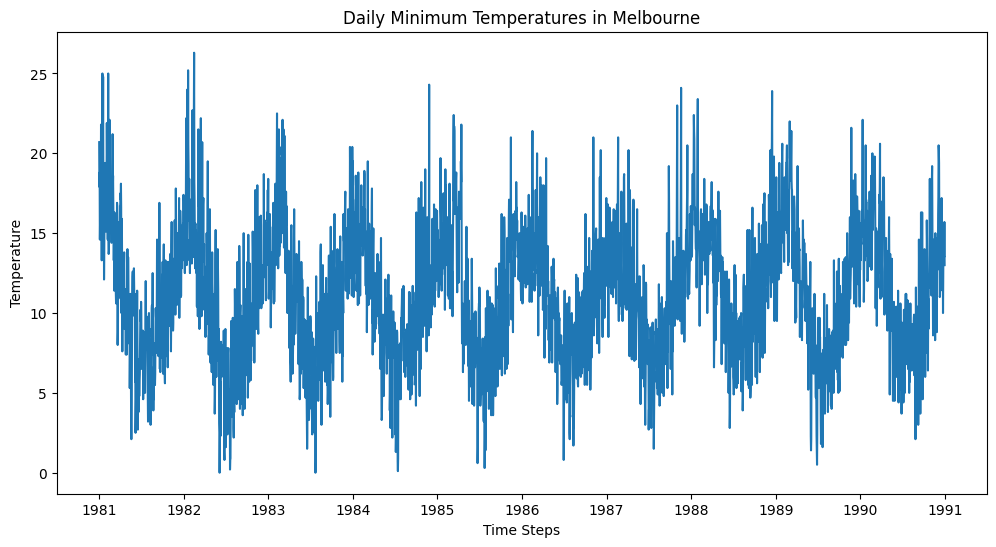

In [126]:
# Plot the whole dataset
def plot_series(x, y, title, xlabel="Time Steps", ylabel="Temperature"):
    plt.figure(figsize=(12, 6))
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_series(data['Date'], temps, "Daily Minimum Temperatures in Melbourne")

In [127]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(-1, 1))
temps_normalized = scaler.fit_transform(temps.reshape(-1, 1)).reshape(-1)

# Create sequences
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 60
X, y = create_sequences(temps_normalized, SEQ_LENGTH)

# Split into training, validation, and test sets
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)
test_size = len(X) - train_size - val_size

X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

In [128]:
# Convert to PyTorch tensors
X_train = torch.from_numpy(X_train).float().unsqueeze(-1)
y_train = torch.from_numpy(y_train).float()
X_val = torch.from_numpy(X_val).float().unsqueeze(-1)
y_val = torch.from_numpy(y_val).float()
X_test = torch.from_numpy(X_test).float().unsqueeze(-1)
y_test = torch.from_numpy(y_test).float()

#### Define the LSTM model

In [133]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Define model, loss function, and optimizer
input_size = 1
hidden_size = 128
num_layers = 2
output_size = 1

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(input_size, hidden_size, output_size, num_layers).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#### Train the model

In [134]:
# Move data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_val, y_val = X_val.to(device), y_val.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Train the model
num_epochs = 100
model.train()
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    model.eval()
    val_outputs = model(X_val)
    val_loss = criterion(val_outputs, y_val)
    
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/100], Train Loss: 0.0926, Val Loss: 0.0955
Epoch [20/100], Train Loss: 0.0926, Val Loss: 0.0994
Epoch [30/100], Train Loss: 0.0925, Val Loss: 0.0974
Epoch [40/100], Train Loss: 0.0925, Val Loss: 0.0982
Epoch [50/100], Train Loss: 0.0925, Val Loss: 0.0979
Epoch [60/100], Train Loss: 0.0925, Val Loss: 0.0981
Epoch [70/100], Train Loss: 0.0925, Val Loss: 0.0979
Epoch [80/100], Train Loss: 0.0925, Val Loss: 0.0981
Epoch [90/100], Train Loss: 0.0925, Val Loss: 0.0980
Epoch [100/100], Train Loss: 0.0925, Val Loss: 0.0981


#### Model Evaluation

In [135]:
# Evaluate the model
model.eval()
with torch.no_grad():
    test_predict = model(X_test)

# Move predictions back to CPU before applying inverse_transform
test_predict_cpu = test_predict.cpu().numpy()
actual_cpu = y_test.cpu().numpy().reshape(-1, 1)

# Inverse transform the predictions and actual values
test_predict_inv = scaler.inverse_transform(test_predict_cpu)
actual_inv = scaler.inverse_transform(actual_cpu)

# Calculate evaluation metrics
mae = mean_absolute_error(actual_inv, test_predict_inv)
mse = mean_squared_error(actual_inv, test_predict_inv)
rmse = np.sqrt(mse)
r2 = r2_score(actual_inv, test_predict_inv)

print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')

MAE: 3.2353
MSE: 15.2570
RMSE: 3.9060
R2 Score: -0.0029


#### Visualization

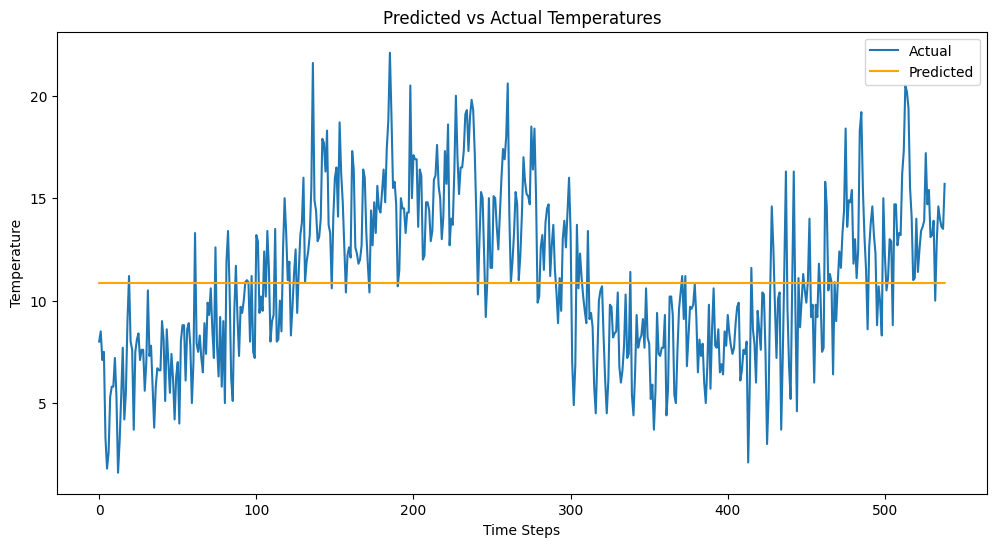

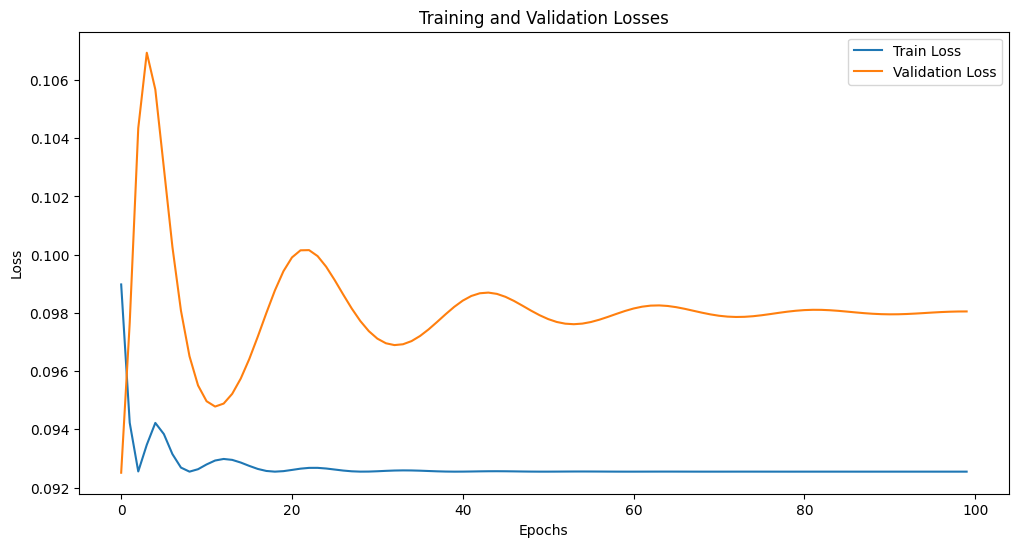

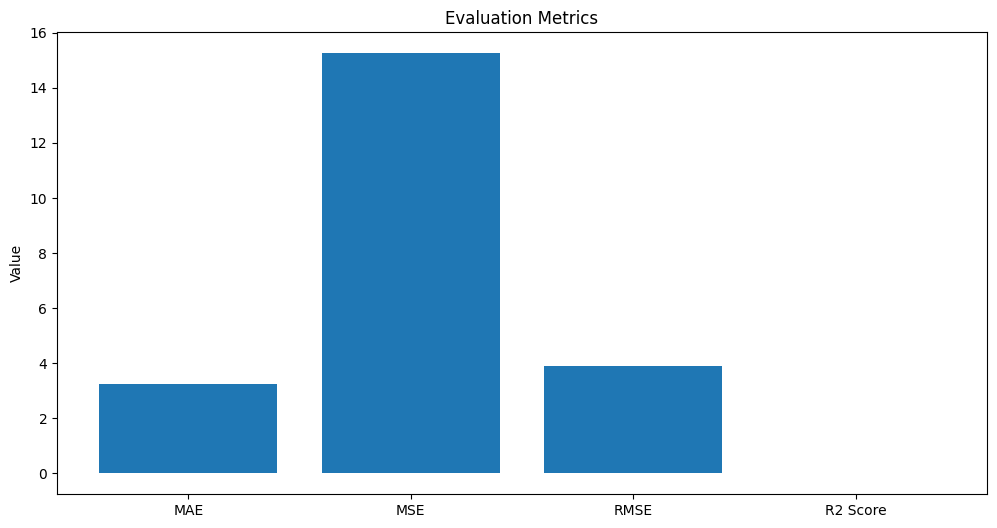

In [136]:
# Plot the results
def plot_predictions(actual, predicted, title):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, label='Actual')
    plt.plot(predicted, label='Predicted', color='orange')
    plt.title(title)
    plt.xlabel("Time Steps")
    plt.ylabel("Temperature")
    plt.legend()
    plt.show()

plot_predictions(actual_inv, test_predict_inv, "Predicted vs Actual Temperatures")

# Plot training and validation losses
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot evaluation metrics
metrics = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}
plt.figure(figsize=(12, 6))
plt.bar(metrics.keys(), metrics.values())
plt.title('Evaluation Metrics')
plt.ylabel('Value')
plt.show()